# Importing The Libraries.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics, pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from time import time
# models
from sklearn.linear_model import LogisticRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Loading The Dataset.

In [3]:
iris=pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Pandas Profiling EDA

In [4]:
pp.ProfileReport(iris)

# Lets Do some manual EDA.

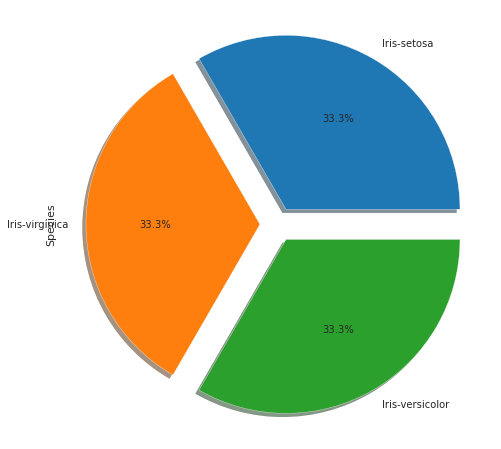

In [5]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

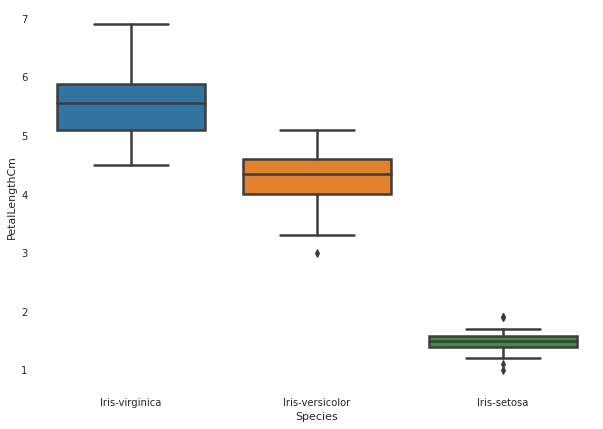

In [6]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=iris,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

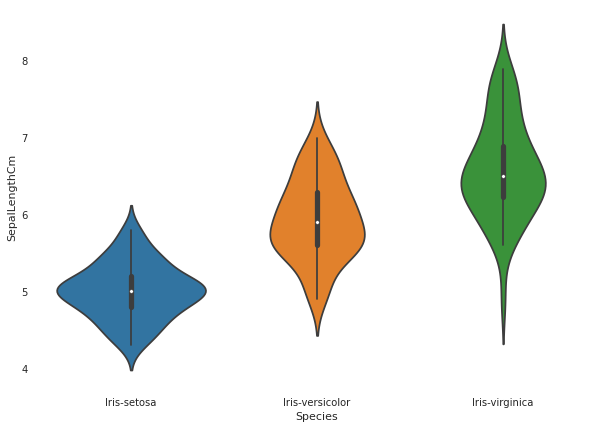

In [7]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='Species',y='SepalLengthCm',data=iris)

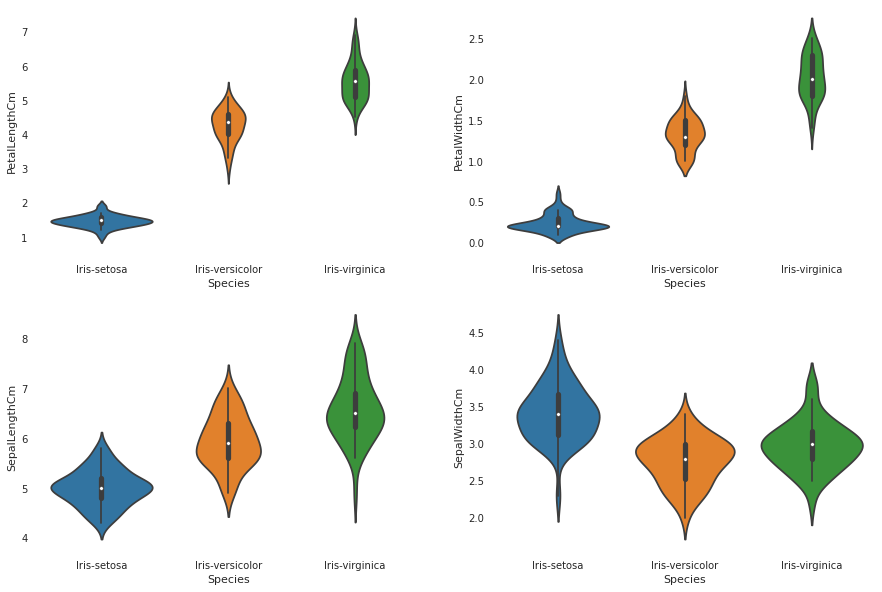

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

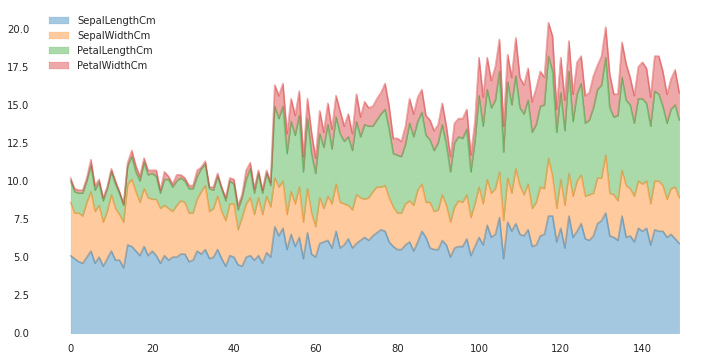

In [9]:
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

# Creating a Function To Compare accuracies.

In [10]:
def acc_summary(pipeline, X_train, y_train, X_val, y_val):
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_val)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_val, y_pred)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [11]:
names = [ 
        'Logistic Regression',
        'Perceptron',
        'Ridge Classifier',
        'SGD Classifier',
        'SVC',
        'Gradient Boosting Classifier', 
        'Extra Trees Classifier', 
        "Bagging Classifier",
        "AdaBoost Classifier", 
        "K Nearest Neighbour Classifier",
         "Decison Tree Classifier",
         "Random Forest Classifier",
         'GaussianNB',
        "Gaussian Process Classifier",
        "MLP Classifier",
        "XGB Classifier",
        "LGBM Classifier"
         ]
classifiers = [
    LogisticRegression(),
    Perceptron(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(), 
    BaggingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    GaussianProcessClassifier(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier()
        ]

zipped_clf = zip(names,classifiers)

In [12]:
def classifier_comparator(X_train,y_train,X_val,y_val,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,X_train, y_train, X_val, y_val)
        result.append((n,clf_acc,tt_time))
    return result

# Splitting The Data.

In [13]:
X_train,X_val,y_train,y_val=train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.1,random_state=2)

In [14]:
classifier_comparator(X_train,y_train,X_val,y_val)

Validation result for Logistic Regression
accuracy : 100.00%
train and test time: 0.06s
--------------------------------------------------------------------------------
Validation result for Perceptron
accuracy : 66.67%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
accuracy : 86.67%
train and test time: 0.04s
--------------------------------------------------------------------------------
Validation result for SGD Classifier
accuracy : 93.33%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for SVC
accuracy : 93.33%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for Gradient Boosting Classifier
accuracy : 100.00%
train and test time: 0.26s
--------------------------------------------------------------------------------
Validation res

[('Logistic Regression', 100.0, 0.06396698951721191),
 ('Perceptron', 66.66666666666666, 0.014610767364501953),
 ('Ridge Classifier', 86.66666666666667, 0.038789987564086914),
 ('SGD Classifier', 93.33333333333333, 0.010698318481445312),
 ('SVC', 93.33333333333333, 0.007101774215698242),
 ('Gradient Boosting Classifier', 100.0, 0.26007795333862305),
 ('Extra Trees Classifier', 100.0, 0.17407822608947754),
 ('Bagging Classifier', 100.0, 0.03820157051086426),
 ('AdaBoost Classifier', 100.0, 0.14326953887939453),
 ('K Nearest Neighbour Classifier', 100.0, 0.012607097625732422),
 ('Decison Tree Classifier', 100.0, 0.008535385131835938),
 ('Random Forest Classifier', 100.0, 0.2374107837677002),
 ('GaussianNB', 100.0, 0.0066318511962890625),
 ('Gaussian Process Classifier', 100.0, 0.06994080543518066),
 ('MLP Classifier', 100.0, 0.19332242012023926),
 ('XGB Classifier', 100.0, 0.048479557037353516),
 ('LGBM Classifier', 100.0, 0.06610369682312012)]

Since the Dataset was pretty small,most models could give a perfect accuracy.But this template might be really useful in other competetions and predictions.

# Thankyou For Reading ...